### install all dependencies

In [16]:
%pip install ultralytics
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### importing dependencies with correct naming

In [3]:
from ultralytics import YOLO
import PIL 
from PIL import Image
from IPython.display import display
import os 
import pathlib 
import cv2
import matplotlib.pyplot as plt

### test if dataset is available

Image files in the folder: 209


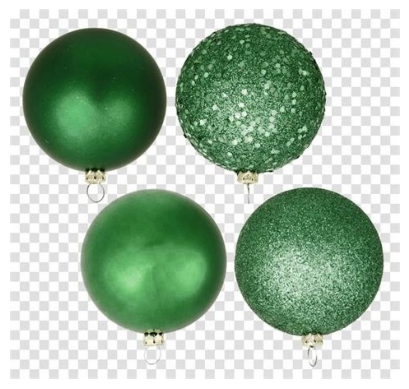

In [5]:

# Get the current directory
current_dir = os.getcwd()

# Construct the base path dynamically
base_path = os.path.join(current_dir, 'dataset/train/images')

# Get the first image file in the folder
image_files = os.listdir(base_path)  # List all files in the folder

print("Image files in the folder:", len(image_files))  # Print the list of image files
first_image_path = os.path.join(base_path, image_files[10])  # Get the path of the first image

# Read the first image
image = cv2.imread(first_image_path)

# Convert from BGR (OpenCV) to RGB (matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the first image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes for a cleaner look
plt.show()

### creating a new yolo model
#### initializing yolo with weightless model

In [6]:
newModel = YOLO('yolov8.yaml')

WARNING no model scale passed. Assuming scale='n'.


#### training model on new data

In [14]:
newModel.train(data="./dataset/data.yaml",epochs=100,cache=True)

Ultralytics 8.3.249  Python-3.10.19 torch-2.9.1+cpu CPU (AMD Ryzen 9 7945HX with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

KeyboardInterrupt: 

####  testing for desired results

In [ ]:
#add an example image
example = "./example.jpg"

results = freshmodel.predict(source=example, save=True, conf=0.2, iou=0.2)
plot = results[0].plot()

# Convert the plot from BGR to RGB
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)

# Create a larger figure size
plt.figure(figsize=(10, 10))  
plt.imshow(plot)
plt.axis('off')
plt.show()

#### exporting to best.pt

In [ ]:
newModel.export()